c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)\DL3_20241006\ch05
c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)\DL3_20241006
==========iteration:0===========
std=0.01:2.302489530096609
Xavier:2.3135321108198688
He:2.4544989081235857
==========iteration:100===========
std=0.01:2.3025428409309567
Xavier:2.2511158207176836
He:1.2953424450154787
==========iteration:200===========
std=0.01:2.302899494418207
Xavier:2.1476267566294904
He:0.7203335111030805
==========iteration:300===========
std=0.01:2.301572000442431
Xavier:1.866748389777635
He:0.3971839472876105
==========iteration:400===========
std=0.01:2.3010735520793286
Xavier:1.3556130123170476
He:0.3428092307233861
==========iteration:500===========
std=0.01:2.301638815865779
Xavier:1.0031455385466763
He:0.3373958731412616
==========iteration:600===========
std=0.01:2.3034704767526133
Xavier:0.6665138500264083
He:0.2883686937867846
==========iteration:700===========
std=0.01:2.300823867310678
Xavier:0.5990277872723913
He:0.31442154966281677
==

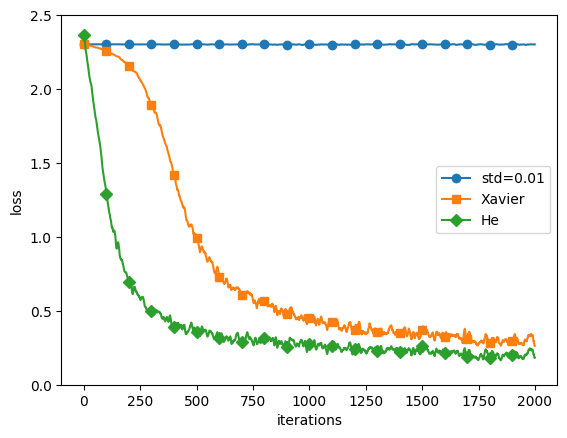

In [2]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

#0. MNIST 데이터 읽기========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정=============
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', "He": 'relu'}
optimizer = SGD(lr = 0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(
        input_size = 784, hidden_size_list = [100, 100, 100, 100],
        output_size =10, weight_init_std= weight_type)
    train_loss[key] = [] #우선 초기화해둠

#2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("=========="+"iteration:"+str(i)+"===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

    
#3. 그래프 그리기==========
markers = {'std=0.01' : 'o', "Xavier" : "s", "He" : "D"}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]),marker=markers[key], markevery=100, label = key)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, 2.5)
plt.legend()
plt.show()

